In [1]:
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Learning Spark") \
    .getOrCreate()

In [2]:
df = spark.read.json("jobs.jsonl")

In [3]:
df.printSchema()

root
 |-- crawler: string (nullable = true)
 |-- identifier: string (nullable = true)
 |-- jobposting: struct (nullable = true)
 |    |-- @context: string (nullable = true)
 |    |-- @type: string (nullable = true)
 |    |-- baseSalary: struct (nullable = true)
 |    |    |-- @context: string (nullable = true)
 |    |    |-- @type: string (nullable = true)
 |    |    |-- currency: string (nullable = true)
 |    |    |-- value: struct (nullable = true)
 |    |    |    |-- @context: string (nullable = true)
 |    |    |    |-- @type: string (nullable = true)
 |    |    |    |-- unitText: string (nullable = true)
 |    |    |    |-- value: string (nullable = true)
 |    |-- datePosted: string (nullable = true)
 |    |-- description: string (nullable = true)
 |    |-- directApply: boolean (nullable = true)
 |    |-- employmentType: string (nullable = true)
 |    |-- hiringOrganization: struct (nullable = true)
 |    |    |-- @context: string (nullable = true)
 |    |    |-- @type: string (

In [4]:
from pyspark.sql.functions import col
d3dates = df.withColumn("posted_at", col("jobposting.datePosted").cast("timestamp"))
d3dates.show()

+---------------+--------------------+--------------------+------------------+--------------------+-------+-------------------+
|        crawler|          identifier|          jobposting|search_engine_type|                 url|version|          posted_at|
+---------------+--------------------+--------------------+------------------+--------------------+-------+-------------------+
|CtCrawlerByCity|9C66C4B0AC1241766...|{https://schema.o...|               JDP|https://mx.comput...|  0.0.7|2023-06-01 00:00:00|
|CtCrawlerByCity|7999364D631BF4486...|{https://schema.o...|               JDP|https://mx.comput...|  0.0.7|2023-06-01 00:00:00|
|CtCrawlerByCity|E20AA3BD0EBBC1566...|{https://schema.o...|               JDP|https://mx.comput...|  0.0.7|2023-04-22 00:00:00|
|CtCrawlerByCity|1A626D177BAE74C76...|{https://schema.o...|               JDP|https://mx.comput...|  0.0.7|2023-05-08 00:00:00|
|CtCrawlerByCity|10D764A262180B006...|{https://schema.o...|               JDP|https://mx.comput...|  0.0

In [5]:
posted_at = d3dates.withColumn("days_diff", pyspark.sql.functions.datediff(col("posted_at"), 
                                            pyspark.sql.functions.current_date())).groupBy("days_diff").count().sort("days_diff")
posted_at.show()

+---------+-----+
|days_diff|count|
+---------+-----+
|     -140|    3|
|     -128|    6|
|     -127|   68|
|     -126|  119|
|     -123|  172|
|     -122|  150|
|     -121|  120|
|     -120|  137|
|     -119|  110|
|     -118|    2|
|     -116|  149|
|     -115|  183|
|     -114|  170|
|     -113|   97|
|     -112|  103|
|     -109|  206|
|     -108|  179|
|     -107|  156|
|     -106|  161|
|     -105|  108|
+---------+-----+
only showing top 20 rows



<Axes: xlabel='days_diff'>

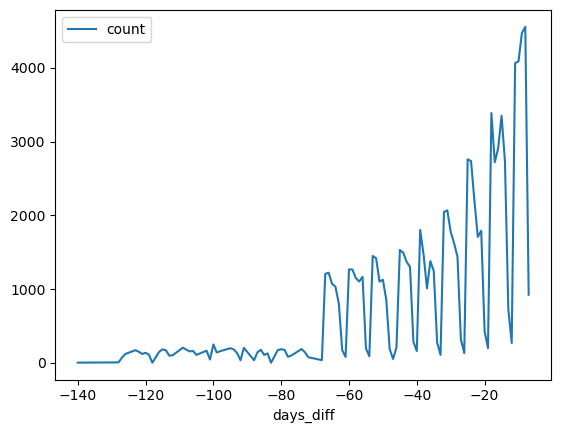

In [6]:
import matplotlib.pyplot as plt
posted_at.toPandas().plot(x="days_diff", y="count")

In [10]:
from pyspark.sql import functions as F
F.explode(df["jobposting"]).show()

TypeError: 'Column' object is not callable